<header style="padding: 4em 0 0em 0">
    <img src="http://brentyi.github.io/filestore/ai4all_logo.svg" style="width: 30em; height: auto;" />
    <h3 style="margin: 1em 0 0 0;">
        <strong>Computer Vision II</strong>
        <span style="color: #777">
        &nbsp;&blacksquare;&nbsp;
        Robotics, Summer 2020</span>
    </h3>
</header>

<hr style="border: 0.2em solid #eee;" />

In the last notebook, we explored the foundational ways that we can use Python to store, visualize, and manipulate images.

Today, we'll build on this knowledge to break down the **convolution**, an operation that's driven the last 50+ years of progress in computer vision research.

At the end of this notebook, you'll have:
- Implemented your own convolution function
- Explored its applications: blurring, edge detection, image recognition

We'll be working exclusively in grayscale, but do think about how you might generalize your code to color images as you progress through the notebook &mdash; this could be useful for your final projects!

<hr style="border: 0.2em solid #eee;" />

Start by running the code cell below to load our imports and some helpers for image loading and visualization. These helpers are the same as in the previous notebook:

In [197]:
import numpy as np
import matplotlib.pyplot as plt


def load_image(path):
    """Load an image from a path.
    
    Args:
        path (str): Location of image to load.
    
    Returns:
        np.ndarray: RGB image, with channels normalized from 0.0-1.0. Shape
        should be `(rows, cols, 3)`.
    """
    # Load our image with the Python Image Library
    # Values by default are 0-255, we divide to normalize to the 0.0-1.0 range
    import PIL.Image

    return np.array(PIL.Image.open(path).convert("RGB")) / 255.0


def visualize_single_channel(title, image):
    """Visualize a 2D array using matplotlib.
    All inputs values should be normalized 0.0-1.0.
    
    Args:
        title (str): Name of image we're visualizing.
        image (np.ndarray): Image we're visualizing. Shape should be `(rows, cols)`.
    """
    assert type(title) == str, "Title not a string!"
    assert len(image.shape) == 2, "Image array not 2D!"

    # Visualize image
    # We manually set the black value with `vmin`, and the white value with `vmax`
    plt.imshow(image, vmin=0.0, vmax=1.0, cmap="gray")

    # Give our plot a title -- this is purely cosmetic!
    plt.title(f"{title}, shape={image.shape}")

    # Show image
    plt.show()

## 1. Image Blur

<img src="https://media.giphy.com/media/3kzJvEciJa94SMW3hN/giphy.gif" style="border-radius: 0.5em; width: 15em; height: auto;" alt="blurred pikachu" />

Before we dive into the convolution operation, let's begin with something slightly more intuitive &mdash; image blurring.

Here's an animation that depicts how we'll approach the image blur problem:

![convolution gif](https://brentyi.github.io/filestore/convolution.gif)

What is this actually depicting?
- The blue grid is the **input image**
- The clear squares around the blue grid is the **input padding**: these are treated as input image pixels with intensity values of 0
- The shaded portion of the input grid at each step of the animation is a **window**
- The teal grid is the **output image**

Each pixel in the output image is computed as the average of a corresponding square window.

Try running the `pad_image()` and `blur_image()` functions that we've written for you, and see if you can answer the checkoff questions below.

In [298]:
def pad_image(grayscale_image, window_size):
    """Pad the borders of an image with zeros.
    
    Args:
        grayscale_image (np.ndarray): Input image.
        window_size (int): Size of the window we are blurring or convolving over.
            Must be odd.
    
    Returns:
        np.ndarray: Zero-padded image.
    """
    assert len(grayscale_image.shape) == 2, "Image shape must be (rows, cols)"
    assert window_size % 2 == 1, "Window size must be odd!"
    pad_amount = window_size // 2

    # Note: we've explicitly written out the pad operation here for clarity,
    # but we could also use the built-in `np.pad()` function
    padded_image = np.zeros(
        shape=(
            grayscale_image.shape[0] + pad_amount * 2,
            grayscale_image.shape[1] + pad_amount * 2,
        )
    )
    padded_image[
        pad_amount:-pad_amount, pad_amount:-pad_amount
    ] = grayscale_image

    return padded_image


def blur_image(grayscale_image, window_size):
    """Blurs an image using a uniform square window.
    
    Args:
        grayscale_image (np.ndarray): Input image.
        window_size (int): Width/height of window to blur over. Must be odd.
    
    Returns:
        np.ndarray: Blurred image.
    """
    assert window_size % 2 == 1, "Window size must be odd!"

    # Zero-pad our input
    padded_image = pad_image(grayscale_image, window_size)

    # Create the output image -- this should be the same shape as the input
    output_image = np.zeros(shape=grayscale_image.shape)

    # Populate each pixel of the output image
    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            window = padded_image[i : i + window_size, j : j + window_size]
            average = np.mean(window)
            output_image[i, j] = average

    # Return the blurred image
    return output_image

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Image Blur Visualization</div>

Using the `visualize_single_channel()` function...

1. Verify that you can display `grayscale_image`.
    - What do you see?
2. Display the output of `pad_image(grayscale_image, window_size=21)`.
    - How did this function change the image?
    - How does the output change as the `window_size` parameter is changed?
3. Display the output of `blur_image(grayscale_image, window_size=21)`.
    - How did this function change the image
    - How does the output change as the `window_size` parameter is changed?

> *Your response here!*

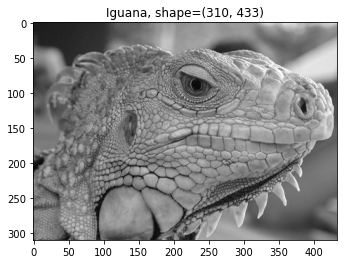

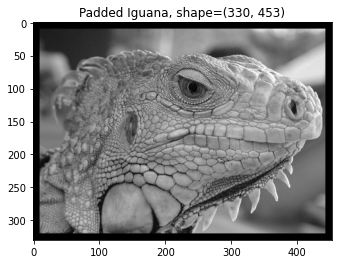

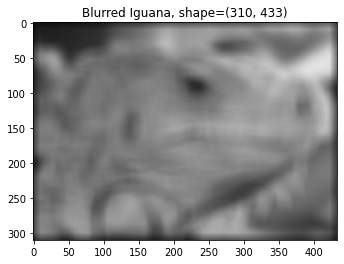

In [299]:
# Load an image of an iguana, and convert it to grayscale by computing the average of the R, G, and B channels
grayscale_image = np.mean(load_image("cv_assets/iguana.png"), axis=-1)
assert grayscale_image.shape == (310, 433)

# Visualization code
# ~~START DELETE~~
# Visualize the Iguana
visualize_single_channel("Iguana", grayscale_image)

# Visualize the output of pad_image()
visualize_single_channel("Padded Iguana", pad_image(grayscale_image, 21))

# Visualize the blurred image
visualize_single_channel("Blurred Iguana", blur_image(grayscale_image, 21))
# ~~END DELETE~~

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study: Image Blur</div>

Now that we've visualized the output of our padding and blurring functions, take a look at the code that was used to generate them and see if you can answer these questions:

1. Look up some documentation for `np.mean()` on Google &mdash; what does it do? Why is it useful for blurring?
2. Inside the for loops of `blur_image()`, we define a `window` variable. What does this represent?
3. Notice that we enforce that `window_size` must be an odd integer. Why? (drawing a picture of what `window` represents might help!)
4. When we pad our image, we add a border of size `window_size // 2` to each of the 4 edges of the image.
    - How is the `//` division operation different from the `/` operation?
    - Why do we divide by 2?

> *Your response here!*

## 2. Convolutions: Implementation

Remember our image blur animation from above?

![convolution gif](https://brentyi.github.io/filestore/convolution.gif)

This same GIF can be used to describe a convolution! (in fact: this animation is from an [article](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) that explains convolutions)

Write some convolution explanation here


### a) NumPy Refresher

Before we get started on implementation, let's revisit two operations that might be useful in NumPy: `np.sum` and the element-wise multiply.

Run this cell, and make sure you understand the outputs:

In [300]:
# fmt: off
a = np.array([
    [1.0, 2.0, 1.0],
    [1.0, 2.0, 1.0],
    [1.0, 2.0, 1.0],
])
b = np.array([
    [0.0, 2.0, 0.0],
    [1.0, 1.0, 1.0],
    [0.0, 2.0, 0.0],
])
# fmt: on

print(np.sum(a))
print()
print(a * b)

12.0

[[0. 4. 0.]
 [1. 2. 1.]
 [0. 4. 0.]]


### b) Convolution Implementation

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Convolution Implementation</div>

Using `blur_image()` as a reference, implement the `convolve_image()` function.

Validate your implementation on the blur task below, then compare and contrast the two functions.

> *Your response here!*

In [301]:
def convolve_image(grayscale_image, kernel):
    """Applies the convolution operation to an input image.
    
    Args:
        grayscale_image (np.ndarray): Input image.
        kernel (np.ndarray): Square kernel to convolve with.
    
    Returns:
        np.ndarray: Output image. Same shape as input.
    """
    window_size, window_size_alt = kernel.shape
    assert window_size == window_size_alt, "Kernel must be square!"
    assert window_size % 2 == 1, "Window size must be odd!"

    # Implement your convolution here: this should look very similar to
    # `blur_image`, and only require two for loops
    # ~~START DELETE~~
    # Zero-pad our input
    padded_image = pad_image(grayscale_image, window_size)

    # Create the output image -- this should be the same shape as the input
    output_image = np.zeros(shape=grayscale_image.shape)

    # Populate each pixel of the output image
    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            window = padded_image[i : i + window_size, j : j + window_size]
            output_image[i, j] = np.sum(kernel * window)

    # Return the convolution output
    return output_image
    # ~~END DELETE~~

To validate your implementation, we can compare its output to `blur_image()` when passed a uniform square blurring kernel:

Uniform blur kernel:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


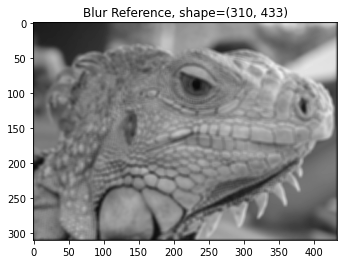

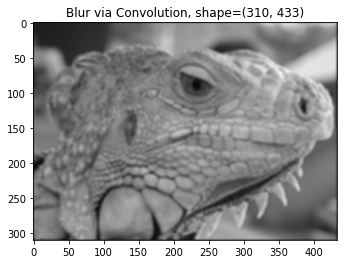

Outputs match!


In [302]:
# Create a kernel that performs a blur over a uniform square window
window_size = 5
uniform_blur_kernel = np.ones((window_size, window_size))
uniform_blur_kernel /= np.sum(uniform_blur_kernel)
print("Uniform blur kernel:")
print(uniform_blur_kernel)

# Visualize a blurred image using `blur_image()`
blurred_image_reference = blur_image(grayscale_image, window_size)
visualize_single_channel("Blur Reference", blurred_image_reference)

# Visualize a blurred image using `convolve_image()`
blurred_image_convolve = convolve_image(grayscale_image, uniform_blur_kernel)
visualize_single_channel("Blur via Convolution", blurred_image_convolve)

# Check that our results actually match!
if np.allclose(blurred_image_reference, blurred_image_convolve):
    print("Outputs match!")
else:
    assert False, "Outputs don't match!"

## 3. Convolutions: Applications

Now that you've implemented your convolution function, let's check out some of the neat things that it can do!

We'll start off by defining a helper function for "normalization", that is, taking an array with arbitrary values and rescaling them to sit between 0.0 and 1.0.
This will be helpful for visualizing the outputs of some of our convolutions.

In [304]:
def normalize(input_array):
    """Normalize an array. Takes an array with arbitrary values, and rescales
    them to sit between 0.0 and 1.0.
    
    Args:
        input_array (np.ndarray): Array to normalize.

    Returns:
        np.ndarray: Normalized array.
    """
    output_image = input_array - np.min(input_array)
    output_image = output_image / np.max(output_image)
    return output_image

### a) Gassian Blur

Say something about Gaussian blurs

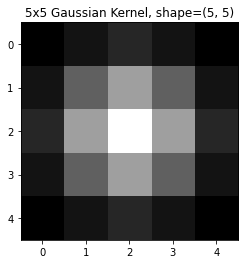

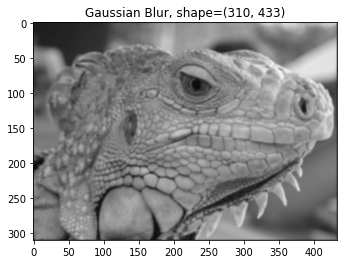

In [323]:
gaussian_kernel = np.array(
    [
        [1, 4, 7, 4, 1],
        [4, 16, 26, 16, 4],
        [7, 26, 41, 26, 7],
        [4, 16, 26, 16, 4],
        [1, 4, 7, 4, 1],
    ]
) / 273

visualize_single_channel("5x5 Gaussian Kernel", normalize(gaussian_kernel))
visualize_single_channel("Gaussian Blur", convolve_image(grayscale_image, gaussian_kernel))

### b) Edge Detection

#### i. Finite Difference Filters

$
K_\text{vertical edges} = \begin{bmatrix}
    0 & 0 & 0\\
    -1 & 0 & 1\\
    0 & 0 & 0\\
\end{bmatrix}
$

$
K_\text{horizontal edges} = \begin{bmatrix}
    0 & -1 & 0\\
    0 & 0 & 0\\
    0 & 1 & 0\\
\end{bmatrix}
$

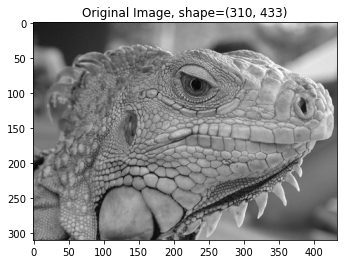

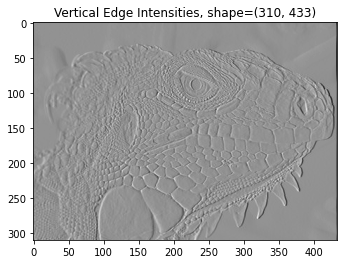

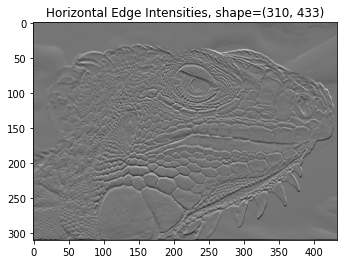

In [305]:
vertical_edge_kernel = None
horizontal_edge_kernel = None

# Define vertical_edge_kernel and horizontal_edge_kernel
# ~~START DELETE~~
# fmt:off
vertical_edge_kernel = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0],
])
horizontal_edge_kernel = np.array([
    [0, -1, 0],
    [0, 0, 0],
    [0, 1, 0],
])
# fmt:on
# ~~END DELETE~~

# Validate kernels
assert vertical_edge_kernel.shape == (3, 3)
assert horizontal_edge_kernel.shape == (3, 3)

# Visualize original image, as well as edge detections
visualize_single_channel("Original Image", grayscale_image)

vertical_edges = convolve_image(grayscale_image, vertical_edge_kernel)
visualize_single_channel(
    "Vertical Edge Intensities", normalize(vertical_edges)
)

horizontal_edges = convolve_image(grayscale_image, horizontal_edge_kernel)
visualize_single_channel(
    "Horizontal Edge Intensities", normalize(horizontal_edges)
)

#### ii. Edge Detection & Trigonometry

With our edge detection filters, we've broken down our edges into two components: a vertical one and a horizontal one.

While relatively straightforward to compute, these two numbers aren't always the easiest to interpret. Instead, computer vision algorithms often use an alternate way of describing edges: by their **magnitude** and **orientations**.

To compute these, we can treat the horizontal and vertical edge components as legs of a right triangle. The vertical edge value is $y$, and the horizontal one is $x$:

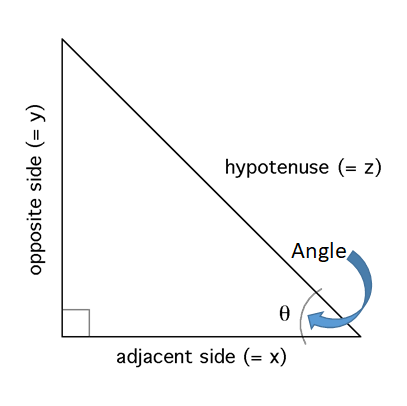

In a right triangle:
- The hypotenuse of the triangle can be computed as $\sqrt{x^2 + y^2}$
    - For us, this is the **magnitude** of the edge
- $\tan(\theta) = \frac{y}{x} \implies$ given $x$ and $y$, we can compute the angle using an inverse tangent (arctan)
    - For us, this is the **orientation** of the edge

We've provided some code for visualizing these values below:

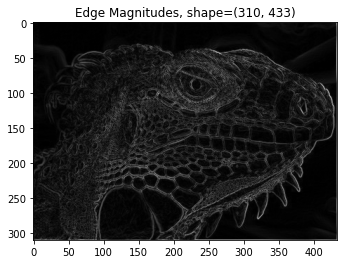

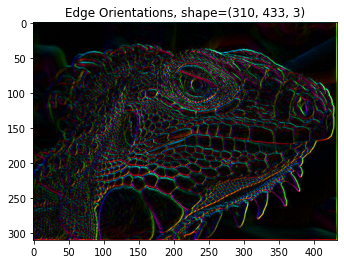

In [315]:
# Compute magnitudes, orientations
edge_magnitudes = np.sqrt(vertical_edges ** 2 + horizontal_edges ** 2)
edge_orientations = np.arctan2(vertical_edges, horizontal_edges)

# Visualize edge magnitudes
visualize_single_channel("Edge Magnitudes", normalize(edge_magnitudes))

# Visualize edge orientations -- using HSL!
# > For each pixel, use the edge orientation value as the "hue"
# > and the edge magnitude as a "lightness"
from cv_helpers import hsl2rgb, visualize_rgb

viz_hsl = np.zeros(grayscale_image.shape + (3,))
viz_hsl[:, :, 0] = (edge_orientations + np.pi) / (2 * np.pi)
viz_hsl[:, :, 1] = 1.0
viz_hsl[:, :, 2] = normalize(edge_magnitudes)

visualize_rgb("Edge Orientations", hsl2rgb(viz_hsl))

### c) Object Recognition

Do Where's Waldo or something